<a href="https://colab.research.google.com/github/jiansim03/Note/blob/main/4_%EB%94%A5%EB%9F%AC%EB%8B%9D%EB%AA%A8%EB%8D%B8%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4-2. 손실함수 loss function
- 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
- 모델이 훈련되는 동안 최소화될 값.
- 손실함수 결과를 통해 파라미터 조절하며 학습 진행된다
- 손실함수는 최적화 이론에서 최소화하고자 하는 함수로 미분 가능한 함수를 이용한다
- Keras 내 주요 손실 함수
  - **sparse_categorical_crossentropy** : 클래스가 배타적 방식으로 구분 (1, 2, 3,...)
  - **categorical_crossentropy** : 클래스가 원-핫 인코딩(one-hot encoding) 방식으로 되어있을때
  - **binary_crossentropy** : 이진분류 수행 시 사용

  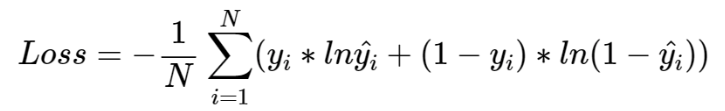

### 평균절대오차(MAE)
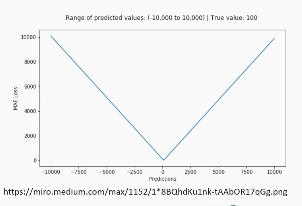


- 오차가 커져도 손실함수가 일정하게 증가
- 이상치에 강건한 특성
- 데이터에서 [입력-정답] 관계가 적절하지 않은 것이 있을 때, 좋은 추정을 하더나도 오차 발생할 수 있는데, 이상치에 해당하는 지점서 손실함수의 최소값으로 가는 정도의 영향력이 크지 않은 특성을 가지고 있음
- 오차가 매우 크더라도(outlier) 제곱항으로 영향을 미치는 것이 아니라 차이의 절대값만큼만 영향을 미치기 때문에 MSE에 비해 상대적으로 이상치에 더 강건하다
- 일반적으로 회귀에 많이 사용
$$ E = {1 \over n}\sum_{k=1}^n \left| y_i -\widehat{y_i} \right| $$

(정답-예측값) 절대값의 평균

### 평균 제곱 오차 (Mean Squared Emor, MSE)  
• 가장 많이 사용되는 손실 함수 중 하나  
• 오차가 커질수록 손실함수가 빠르게 증가하는 특성  
• 정답과 예측한 값의 차이가 클수록 더 많은 페널티를 부어하는 형태로 동작  
• 일반적으로 회귀 (Regression)에 사용되는 손실함수    

$$ E = {1 \over n}\sum_{k=1}^n (y_i -\widehat{y_i})^2 $$

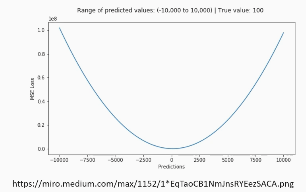



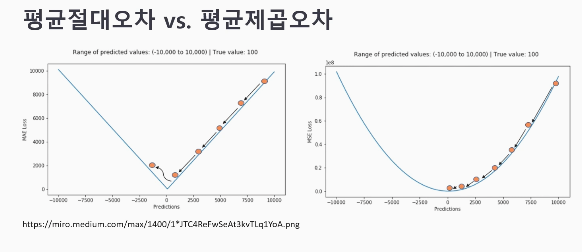

### 원-핫 인코딩 (One-Hot Encoding)
• 범주형 변수를 표현할 때 사용  
• 가변수(Dummy Variable)라고도 함  
• 정답인 레이블만 1이고 나미지는 0으로 처리하는 형태  
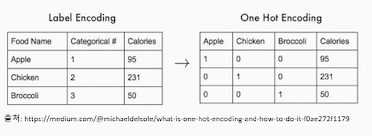

### 교차 엔트로피 오차 (Cross Entropy Error, CEE)
• 이진 분류(Binary Classification) 또는 다중 클래스 분류(Multl Class Classificatlon)에 주로 사용  
• 오차는 소프트맥스(softmax) 결과와 원.핫 인코딩(ont:not encoding) 사이의 출릭 간 거리를 비교  
• 정답을 맞추면 오차가 0, 들리면 그 차이가 클수록 오차가 무한히 커지게 됨
(정답이면 y^~ 즉 진수가 1이 되어 로그의 전체값은 0이됨)

$$ E = -\sum_{k=1}^i k_ilog_e{y_k} $$


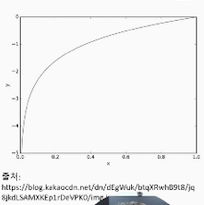

### 모델 생성

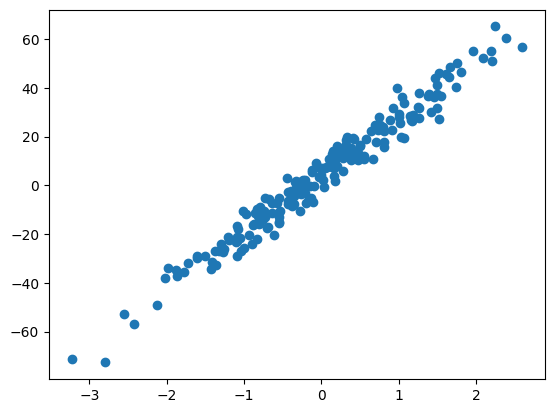

In [9]:
# 선형회귀를 위한 딥러닝 모델을 만든다
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1,
                       bias=5.0, noise=5.0, random_state=123)
y = np.expand_dims(y, axis=1)

plt.scatter(X, y)
plt.show()

In [10]:
# 데이터를 학습용, 테스으용으로 분리한다
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=123)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils

In [12]:
# 모델 생성 : 입력 1차원, 유닛 수 1개
model = keras.Sequential()
model.add(layers.Dense(1, activation='linear', input_shape={1,}))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


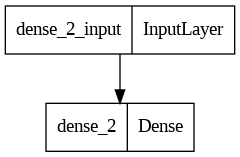

In [13]:
# 시각화
utils.plot_model(model)

### 모델학습
- optimizer : 학습 진행방식 결정
- metrics : 평가 지표
- epoch : 학습 반복 횟수

In [17]:
optimizer = optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])
history = model.fit(x_train, y_train, epochs=40)

Epoch 1/40
5/5 [==============================] - 1s 4ms/step - loss: 547.1014 - mae: 18.7490 - mse: 547.1014
Epoch 2/40
5/5 [==============================] - 0s 4ms/step - loss: 439.3447 - mae: 16.8579 - mse: 439.3447
Epoch 3/40
5/5 [==============================] - 0s 3ms/step - loss: 354.3083 - mae: 15.1474 - mse: 354.3083
Epoch 4/40
5/5 [==============================] - 0s 5ms/step - loss: 286.5300 - mae: 13.5760 - mse: 286.5300
Epoch 5/40
5/5 [==============================] - 0s 3ms/step - loss: 232.3862 - mae: 12.2541 - mse: 232.3862
Epoch 6/40
5/5 [==============================] - 0s 7ms/step - loss: 189.2794 - mae: 11.0497 - mse: 189.2794
Epoch 7/40
5/5 [==============================] - 0s 3ms/step - loss: 155.0480 - mae: 10.0061 - mse: 155.0480
Epoch 8/40
5/5 [==============================] - 0s 4ms/step - loss: 127.8108 - mae: 9.0914 - mse: 127.8108
Epoch 9/40
5/5 [==============================] - 0s 4ms/step - loss: 106.0281 - mae: 8.2298 - mse: 106.0281
Epoch 10/40


In [19]:
# 학습과정을 기록한 history에 어떤 값이 있는지 확인
history.history.keys()

dict_keys(['loss', 'mae', 'mse'])

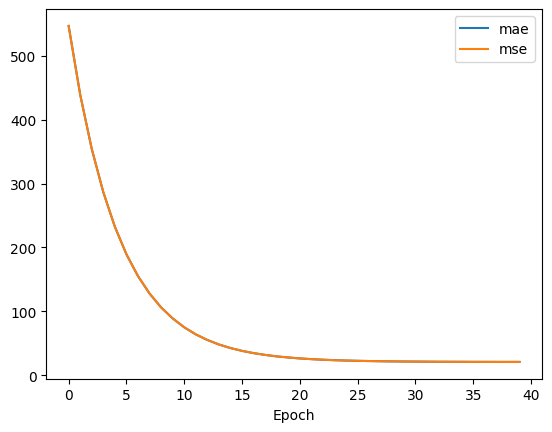

In [20]:
plt.plot(history.history['mse'])
plt.plot(history.history['mse'])
plt.xlabel('Epoch')
plt.legend(['mae','mse']) # 범례 : 각 선이 어떤 데이터를 나타내는지 설명
plt.show()

### 모델 평가

In [22]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 11ms/step - loss: 21.9113 - mae: 3.9876 - mse: 21.9113


[21.911300659179688, 3.9876205921173096, 21.911300659179688]

### 모델 예측
X에 대한 예측값을 predict()를 통해 결과로 받아온다  
- X : 입력데이터
- y : 실제 데이터의 결과값  
- result : 모델의 예측 결과

7/7 [==============================] - 0s 2ms/step


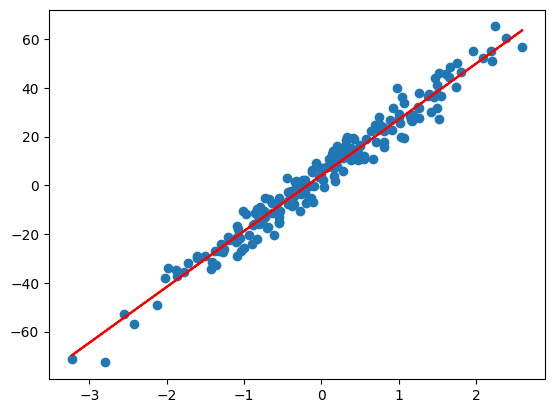

In [23]:
result = model.predict(X)

plt.scatter(X, y)
plt.plot(X, result, 'r')
plt.show()

In [24]:
# layers 키워드로 사용한 레이어를 살펴볼 수 있다
model.layers

- layers.name : 레이어 이름 확인
- get_layer() 같은 이름의 레이어 얻을 수 O

In [30]:
layer = model.layers[0] # 0번째 레이어 불러와 이름 확인
print(layer.name)
layer = model.get_layer('dense_2')
print(layer.name)

dense_2
dense_2


In [32]:
# 가중치와 편향도 얻어보자
weights, biases = layer.get_weights()
print(weights)
print(biases)

[[22.908873]]
[4.177319]


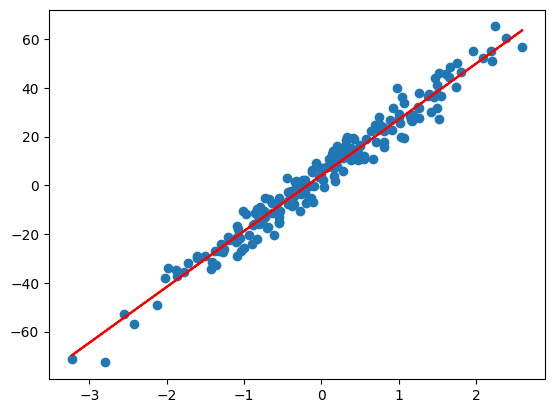

In [33]:
# 딥러닝 모델에서 학습된 가중치(weights)와 바이어스(biases)를 통해 선형회귀식을 np.array(weights * X + biases)로 표현할 수 있다
plt.scatter(X, y)
plt.plot(X, np.array(weights * X + biases), 'r')
plt.show()